# CA1 - Piechart to analyse bank loan application distribution by application type using HDB dataset

In [1]:
# import the necessary packages
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
# load csv file and create dataset 

filename = "C:/Users/lokf2/Desktop/SPDS/IT8701/CA1 Assignment1/hdb_dataset/ApplicationsReceivedtoFinancePurchasesRefinanceMortgageLoanwithBankLoans.csv"

data = np.genfromtxt(filename, 
                     skip_header=1, 
                     dtype=[('financial_year', 'U50'), ('application_type', 'U50'), ('no_of_applications', 'i8')], 
                     delimiter=',',
                     missing_values=['na', '-', 'NA'], filling_values=0)
print(data[:10])
print(data.dtype)
print(data.shape)

[('2008', 'new flat buyers',   936) ('2008', 'resale flat buyers', 14913)
 ('2008', 'existing flat owners (refinance)',    42)
 ('2009', 'new flat buyers',   948) ('2009', 'resale flat buyers', 22345)
 ('2009', 'existing flat owners (refinance)',   101)
 ('2010', 'new flat buyers',   868) ('2010', 'resale flat buyers', 17990)
 ('2010', 'existing flat owners (refinance)',   329)
 ('2011', 'new flat buyers',  2402)]
[('financial_year', '<U50'), ('application_type', '<U50'), ('no_of_applications', '<i8')]
(57,)


In [3]:
# Printout useful information about the datset 
print("*** Useful summary of dataset - Applications Received to Finance Purchases/Refinance Mortgage Loan with Bank Loans ***")
print()
print(f"There are {len(data)} rows and {len(data[0])} columns in this dataset")
print()

print("[The names of the columns are:]")
for col in data.dtype.names:
    print(f"- {col} <class '{data[col].dtype}'> isnumeric: {np.issubdtype(data[col].dtype, np.number)}")
print()

print("[The unique values in each column are:]") 
for col in data.dtype.names:
    unique_values = np.unique(data[col])
    print(f"{len(unique_values)} unique values in {col} column")

*** Useful summary of dataset - Applications Received to Finance Purchases/Refinance Mortgage Loan with Bank Loans ***

There are 57 rows and 3 columns in this dataset

[The names of the columns are:]
- financial_year <class '<U50'> isnumeric: False
- application_type <class '<U50'> isnumeric: False
- no_of_applications <class 'int64'> isnumeric: True

[The unique values in each column are:]
15 unique values in financial_year column
4 unique values in application_type column
54 unique values in no_of_applications column


In [4]:
# Manipulate dataset

# Extract rows containing required keywords only
data_app_types = data[np.isin(data['application_type'],['new flat buyers','resale flat buyers','existing flat owners(refinance)',
                                'DBSS flat buyers'])]

#print(data_app_types)
# Extract Labels and Values
labels = data_app_types['application_type']
values = data_app_types['no_of_applications']

print(labels[:10])
print(labels.dtype)
print(labels.shape)
print()
print(values[:10])
print(values.dtype)
print(values.shape)



['new flat buyers' 'resale flat buyers' 'new flat buyers'
 'resale flat buyers' 'new flat buyers' 'resale flat buyers'
 'new flat buyers' 'resale flat buyers' 'DBSS flat buyers'
 'new flat buyers']
<U50
(42,)

[  936 14913   948 22345   868 17990  2402 15039   271  2219]
int64
(42,)


In [5]:
#Extract and Sort Labels
labels = list(set(data['application_type']))
labels.sort()
print("labels: ", labels)
print()

labels:  ['DBSS flat buyers', 'existing flat owners (refinance)', 'new flat buyers', 'resale flat buyers']



In [6]:
#Create Levels Array
levels = np.arange(0,len(labels))
print("levels:", levels)
print()

levels: [0 1 2 3]



In [7]:
#Extract application type and no of applications Columns
levels_values = data[['application_type','no_of_applications']]
print("levels_values: ", levels_values)

levels_values:  [('new flat buyers',   936) ('resale flat buyers', 14913)
 ('existing flat owners (refinance)',    42) ('new flat buyers',   948)
 ('resale flat buyers', 22345) ('existing flat owners (refinance)',   101)
 ('new flat buyers',   868) ('resale flat buyers', 17990)
 ('existing flat owners (refinance)',   329) ('new flat buyers',  2402)
 ('resale flat buyers', 15039) ('existing flat owners (refinance)',   548)
 ('DBSS flat buyers',   271) ('new flat buyers',  2219)
 ('resale flat buyers', 15259) ('existing flat owners (refinance)',   611)
 ('DBSS flat buyers',  1017) ('new flat buyers',  2474)
 ('resale flat buyers',  9213) ('existing flat owners (refinance)',  1399)
 ('DBSS flat buyers',   244) ('new flat buyers',  2122)
 ('resale flat buyers',  9318) ('existing flat owners (refinance)',   578)
 ('DBSS flat buyers',   121) ('new flat buyers',  1730)
 ('resale flat buyers',  8211) ('existing flat owners (refinance)',   156)
 ('DBSS flat buyers',    44) ('new flat buyers',  

In [8]:
#Extract no of applications Values
values = levels_values['no_of_applications']
print("values: ", values)

values:  [  936 14913    42   948 22345   101   868 17990   329  2402 15039   548
   271  2219 15259   611  1017  2474  9213  1399   244  2122  9318   578
   121  1730  8211   156    44  1840  8207   326     5  2235  8563  1020
     7  1499  8136   764     2   609  7577   566     2   690  9920  6809
     0   779 12743  4770     2   411  9461   905     0]


In [9]:
# Extract no of applications in each bank loan type
values_DBSSflatbuyers = values[levels_values['application_type'] == 'DBSS flat buyers']
values_existingflatowners = values[levels_values['application_type'] == 'existing flat owners (refinance)']
values_newflatbuyers = values[levels_values['application_type'] == 'new flat buyers']
values_resaleflatbuyers = values[levels_values['application_type'] == 'resale flat buyers']


In [10]:
# Sum up values in each type and combine them in a list
values_combined =[np.sum(values_DBSSflatbuyers), np.sum(values_existingflatowners), np.sum(values_newflatbuyers), np.sum(values_resaleflatbuyers)]
print(len(values_combined))
values_combined

4


[1715, 18924, 21762, 176895]

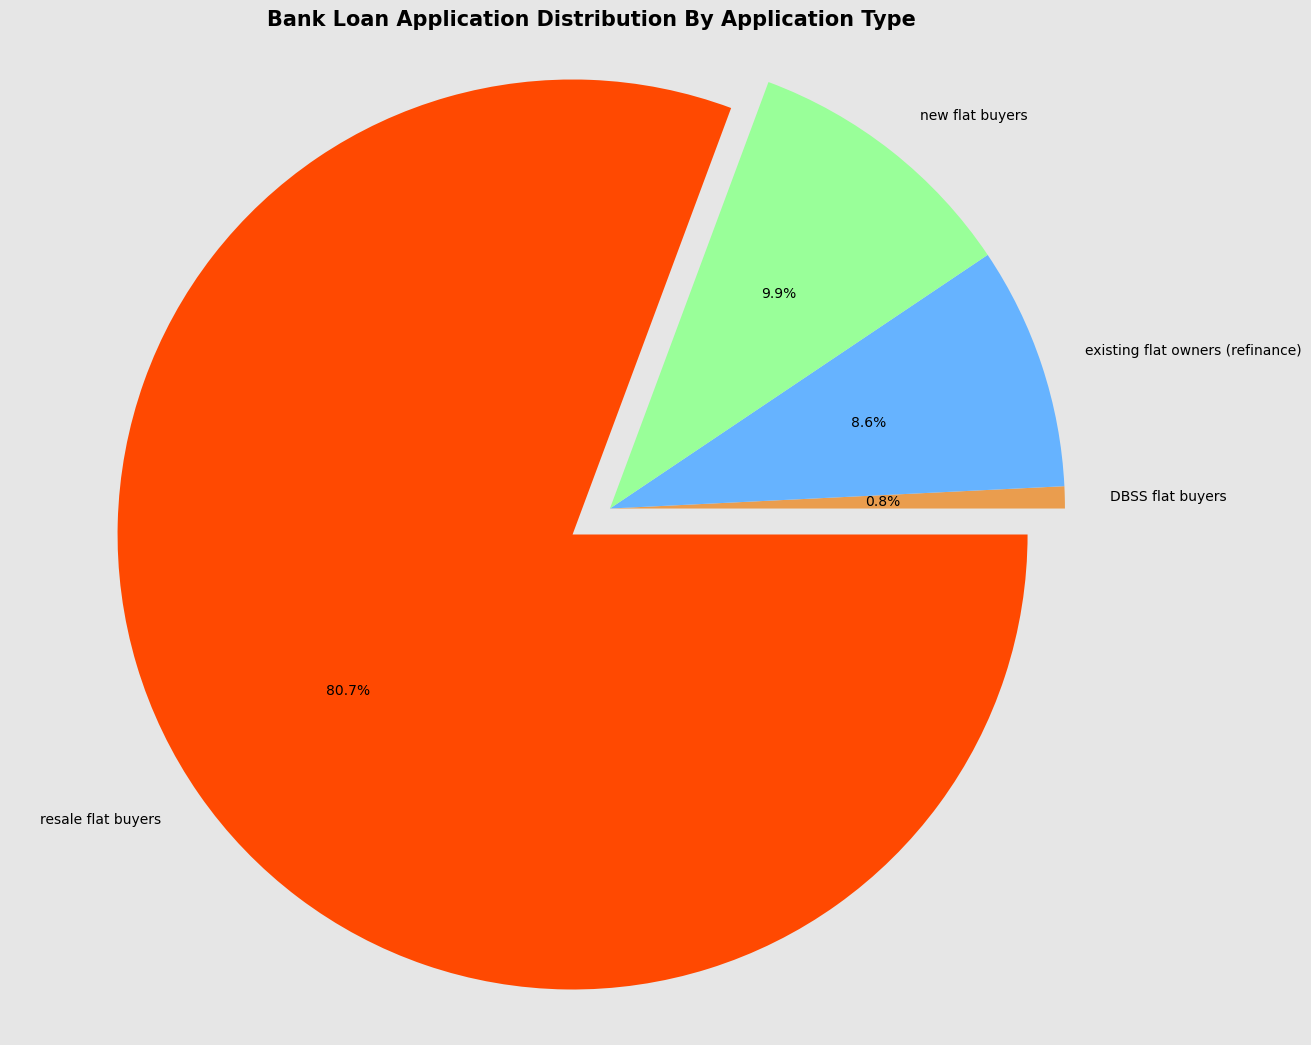

In [11]:
# Create Pie chart
explode = (0, 0, 0, 0.1) # Explode 4th
colors = ['#ea9d4e','#66b3ff','#99ff99','#FF4901'] # List of colors

fig1, ax1 = plt.subplots(figsize=(15, 13))
ax1.pie(values_combined, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=0, explode=explode, colors=colors)

# Set background color for the axes and figure
ax1.set_facecolor('#f2f2f2')  
fig1.patch.set_facecolor('#e6e6e6') 

# Eq aspect ratio draws pie as circle
ax1.axis('equal')
plt.title("Bank Loan Application Distribution By Application Type", fontsize=15, loc='center', fontweight='bold')

# Save piechart to png file
plt.savefig('Piechart - Bank Loan Application Distribution By Application Type.png', dpi=300, bbox_inches='tight')

plt.show()